git:https://github.com/Yuhan-Chen831/DCSI-510_Final_Project

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms # BP test
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import statsmodels.stats.outliers_influence as smo
import patsy as pt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.anova import anova_lm

In [2]:
# read csv 
diamonds = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/diamonds.csv')
# display the dataset
print(diamonds.head())

   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [3]:
#Create a dataframe
df = pd.DataFrame(diamonds)
print("The DataFrame object")
print(df)

The DataFrame object
       Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [5]:
df.describe().round()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0,53940.0
mean,26970.0,1.0,62.0,57.0,3933.0,6.0,6.0,4.0
std,15571.0,0.0,1.0,2.0,3989.0,1.0,1.0,1.0
min,1.0,0.0,43.0,43.0,326.0,0.0,0.0,0.0
25%,13486.0,0.0,61.0,56.0,950.0,5.0,5.0,3.0
50%,26970.0,1.0,62.0,57.0,2401.0,6.0,6.0,4.0
75%,40455.0,1.0,62.0,59.0,5324.0,7.0,7.0,4.0
max,53940.0,5.0,79.0,95.0,18823.0,11.0,59.0,32.0


In [6]:
# correlation matrix
cormat = diamonds[[]]
cormat.corr().round(decimals=3)

""


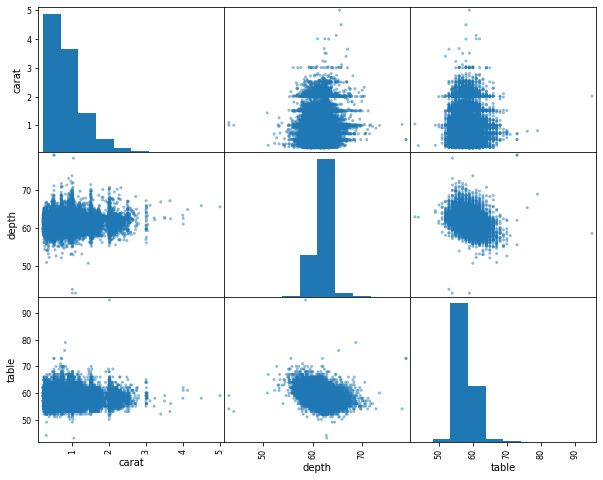

In [7]:
# correlation graphs
pd.plotting.scatter_matrix(diamonds[['carat','cut', 'color', 'clarity', 'depth', 'table']], alpha=0.5, figsize=(10, 8));

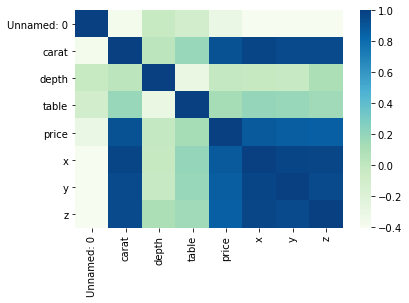

In [8]:
# heatmap
correlations = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(correlations,cmap='GnBu')
plt.show()


Quantitative analysis

(325.0, 20000.0)

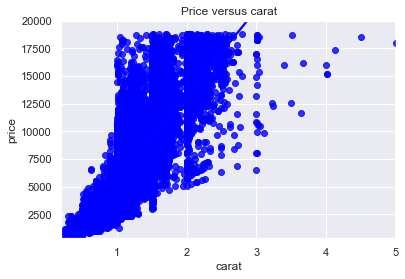

In [10]:
# individual quantitative variable analysis
sns.set_theme(color_codes=True)
plot1 = sns.regplot(x="carat", y="price", data=df, color='blue')
plot1.set_title('Price versus carat')
plot1.set_ylim(325,20000)

From the graph above, we found that there is a direct relationship between carat and price, and the slope of the linear regression model is big, which means an increase in carat will lead to a large increase in price.



(50.0, 75.0)

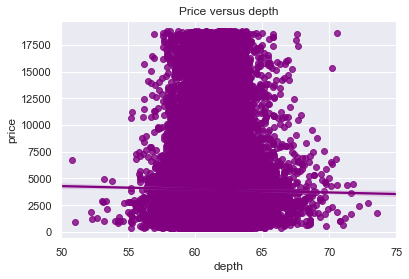

In [11]:
plot2 = sns.regplot(x="depth", y="price", data=df, color = 'purple')
plot2.set_title('Price versus depth')
plot2.set_xlim(50,75)


From the graph above, we found that the change in depth does not result in significant changes in the price of diamonds.

(40.0, 80.0)

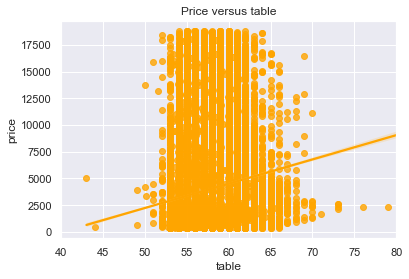

In [12]:
plot3 = sns.regplot(x="table", y="price", data=diamonds, color='orange')
plot3.set_title('Price versus table')
plot3.set_xlim(40,80)

From the graph above, we found that there is a direct relationship between table and price, but the slope of the linear regression model is relatively small compared to carat, which means the influence on the price of table is smaller than the influence of carat.

In [13]:
cut = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
cut_len = []
for i in cut:
    aux = diamonds.apply(lambda x: True if x['cut'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_len.append(aux_len)
cut_len
# individual qualitative variable analysis
# number of different kinds of cuts

[1610, 4906, 12082, 13791, 21551]

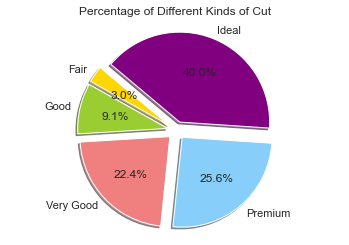

In [14]:
# pie chart for cut
labels = 'Fair', 'Good', 'Very Good', 'Premium', 'Ideal'
sizes = [1610, 4906, 12082, 13791,21551]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'purple']
explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Different Kinds of Cut')

plt.axis('equal')
plt.show()

From the pie chart, we found that the percentage of ideally-cut diamonds is the biggest while the percentage of fairly-cut diamonds is the smallest.

In [15]:
# number of different kinds of colors
color = ('D', 'E', 'F', 'G', 'H', 'I', 'J')
color_len = []
for i in color:
    aux = diamonds.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    color_len.append(aux_len)
color_len

[6775, 9797, 9542, 11292, 8304, 5422, 2808]

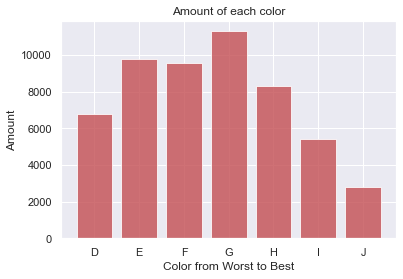

In [16]:
# bar chart for color
plt.bar(color, color_len, align='center',color='r', alpha=0.8)
plt.title('Amount of each color')
plt.xlabel('Color from Worst to Best')
plt.ylabel('Amount')
plt.show()


From the graph above, this is a quantitative distribution of different kinds of colors, and the graph is right-skewed. We can also found that the amount of color "G" is the largest and the amount of color "J" is the smallest.

In [18]:
# create a sub-dataset for each cut
cut_ide = diamonds.loc[diamonds['cut'] == 'Ideal'] ## select a sub-dataset where cut is Ideal
cut_pre = diamonds.loc[diamonds['cut'] == 'Premium'] ## select a sub-dataset where cut is Premium
cut_vgood = diamonds.loc[diamonds['cut'] == 'Very Good'] ## select a sub-dataset where cut is very Good
cut_good = diamonds.loc[diamonds['cut'] == 'Good'] ## select a sub-dataset where cut is Good
cut_fair = diamonds.loc[diamonds['cut'] == 'Fair'] ## select a sub-dataset where cut is Fair

In [19]:
# number of different kinds of color for each cut
cut_ide_color = []
cut_pre_color = []
cut_vgood_color = []
cut_good_color = []
cut_fair_color = []
for i in color:
    aux = cut_ide.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_ide_color.append(aux_len)
for i in color:
    aux = cut_pre.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_pre_color.append(aux_len)
for i in color:
    aux = cut_vgood.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_vgood_color.append(aux_len)
for i in color:
    aux = cut_good.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_good_color.append(aux_len)
for i in color:
    aux = cut_fair.apply(lambda x: True if x['color'] == i else False, axis=1)
    aux_len = len(aux[aux == True].index)
    cut_fair_color.append(aux_len)
cut_color  = [cut_ide_color, cut_pre_color, cut_vgood_color, cut_good_color, cut_fair_color]
cut_color


[[2834, 3903, 3826, 4884, 3115, 2093, 896],
 [1603, 2337, 2331, 2924, 2360, 1428, 808],
 [1513, 2400, 2164, 2299, 1824, 1204, 678],
 [662, 933, 909, 871, 702, 522, 307],
 [163, 224, 312, 314, 303, 175, 119]]

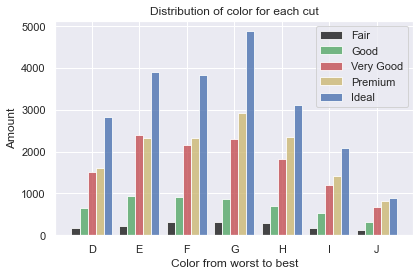

In [20]:
# distribution of color for each cut
n_groups = 7
fig, ax = plt.subplots()
bar_width = 0.17
opacity = 0.8
index = np.arange(n_groups)

plt.bar(index, cut_fair_color, bar_width,alpha=opacity,color='k',label='Fair')
plt.bar(index+ bar_width, cut_good_color, bar_width,alpha=opacity,color='g',label='Good')
plt.bar(index+ 2*bar_width, cut_vgood_color, bar_width,alpha=opacity,color='r',label='Very Good')
plt.bar(index+ 3*bar_width, cut_pre_color, bar_width,alpha=opacity,color='y',label='Premium')
plt.bar(index+ 4*bar_width, cut_ide_color, bar_width,alpha=opacity,color='b',label='Ideal')

plt.xlabel('Color from worst to best')
plt.ylabel('Amount')
plt.title('Distribution of color for each cut')
plt.xticks(index + 2*bar_width, color)
plt.legend()

plt.tight_layout()
plt.show()


From the graph above, we found that the quantitative distribution of color in each kind of cut is approximately normal distribution.